# 个人统计

## 两对比实验

In [6]:
statistics_personal_warm_cold = pd.DataFrame()
statistics_personal_warm_cold['experience_id']=[i for i in range(1,9)]
# 实验类别
statistics_personal_warm_cold['experience_content'] = [
    'cold','cold','cold','cold',
    'warm','warm','warm','warm',
    # 'rank','rank','rank',
    # 'mix','mix','mix'
]
# 实验色差梯度
statistics_personal_warm_cold['color_gradient'] = [
    2,2,2,2,2,2,2,2,
    # 5,3,1,5,3,1
]
# 实验色差
statistics_personal_warm_cold['experience_chromatism'] = statistics_personal_warm_cold.color_gradient*[int(i[1])-int(i[-2]) for i in df_1.target[:8]]
# 实验正确选项
correct_options_list = []
for i in statistics_personal_warm_cold['experience_chromatism']:
    if i<0:
        correct_options_list.append('right')
    else:
        correct_options_list.append('left')
statistics_personal_warm_cold['correct_options'] = correct_options_list
# 实际选择：
statistics_personal_warm_cold['experience_options'] = df_1.experience[:8]
# 正确与否
statistics_personal_warm_cold['experience_result'] = [
    statistics_personal_warm_cold['experience_options'][i]==statistics_personal_warm_cold['correct_options'][i]
    for i in range(statistics_personal_warm_cold['correct_options'].shape[0])
]
statistics_personal_warm_cold 

,experience_id,experience_content,color_gradient,experience_chromatism,correct_options,experience_options,experience_result
0,1,cold,2,-6,right,right,True
1,2,cold,2,4,left,left,True
2,3,cold,2,2,left,left,True
3,4,cold,2,-8,right,right,True
4,5,warm,2,-8,right,right,True
5,6,warm,2,-4,right,right,True
6,7,warm,2,6,left,left,True
7,8,warm,2,2,left,left,True


## 多排序实验

In [7]:
statistics_personal_rank = pd.DataFrame()
statistics_personal_rank['experience_id']=[i for i in range(9,15)]
# 实验类别
statistics_personal_rank['experience_content'] = [
    # 'cold','cold','cold','cold',
    # 'warm','warm','warm','warm',
    'rank','rank','rank',
    'mix','mix','mix'
]
# 实验色差梯度
statistics_personal_rank['color_gradient'] = [
    # 2,2,2,2,2,2,2,2,
    5,3,1,5,3,1
]
# 实验正确选项
correct_options_list = []
for i in df_1.target[8:]:
    correct_options_list.append(i[1]+i[4]+i[7]+i[10]+i[13])
statistics_personal_rank['correct_options'] = correct_options_list
# 实际选择：
experience_options_list = []
for i in df_1.experience[8:]:
    i = i.split("'")
    experience_options_list.append(i[1]+i[3]+i[5]+i[7]+i[9])
statistics_personal_rank['experience_options'] = experience_options_list
# 正确与否
statistics_personal_rank['experience_result'] = [
    statistics_personal_rank['experience_options'][i]==statistics_personal_rank['correct_options'][i]
    for i in range(statistics_personal_rank['correct_options'].shape[0])
]
statistics_personal_rank 


,experience_id,experience_content,color_gradient,correct_options,experience_options,experience_result
0,9,rank,5,31425,31425,True
1,10,rank,3,43215,43215,True
2,11,rank,1,14352,14253,False
3,12,mix,5,21534,21534,True
4,13,mix,3,23451,24351,False
5,14,mix,1,15342,25341,False


## 个人统计

In [8]:
statistics_personal_warm_cold.experience_result.value_counts()[True]

8

In [9]:
statistics_personal_rank.experience_result.describe()


count        6
unique       2
top       True
freq         3
Name: experience_result, dtype: object

In [10]:
[
    statistics_personal_warm_cold.experience_result[:4].value_counts()[True]/4,
    statistics_personal_warm_cold.experience_result[4:].value_counts()[True]/4,
    statistics_personal_rank.experience_result[:3].value_counts()[True]/3,
    statistics_personal_rank.experience_result[3:].value_counts()[True]/3
    
]

[1.0, 1.0, 0.6666666666666666, 0.3333333333333333]

In [11]:
statistics_personal_all = pd.DataFrame()
# 实验类别
statistics_personal_all['experience_content'] = [
    'cold','warm','rank','mix'
]
# 个人准确率
statistics_personal_all['correct_rate'] = [
    statistics_personal_warm_cold.experience_result[:4].value_counts()[True]/4,
    statistics_personal_warm_cold.experience_result[4:].value_counts()[True]/4,
    statistics_personal_rank.experience_result[:3].value_counts()[True]/3,
    statistics_personal_rank.experience_result[3:].value_counts()[True]/3
    
]
statistics_personal_all

,experience_content,correct_rate
0,cold,1.000000
1,warm,1.000000
2,rank,0.666667
3,mix,0.333333


## 个人统计函数

In [12]:
def statistics_personal(df_path):
    import pandas as pd
    df_1 = pd.read_excel('1.xls',header=None).iloc[:,1:]
    df_1.columns = ['target','experience']

    # warm&cold
    statistics_personal_warm_cold = pd.DataFrame()
    statistics_personal_warm_cold['experience_id']=[i for i in range(1,9)]
    # 实验类别
    statistics_personal_warm_cold['experience_content'] = [
        'cold','cold','cold','cold',
        'warm','warm','warm','warm',
        # 'rank','rank','rank',
        # 'mix','mix','mix'
    ]
    # 实验色差梯度
    statistics_personal_warm_cold['color_gradient'] = [
        2,2,2,2,2,2,2,2,
        # 5,3,1,5,3,1
    ]
    # 实验色差
    statistics_personal_warm_cold['experience_chromatism'] = statistics_personal_warm_cold.color_gradient*[int(i[1])-int(i[-2]) for i in df_1.target[:8]]
    # 实验正确选项
    correct_options_list = []
    for i in statistics_personal_warm_cold['experience_chromatism']:
        if i<0:
            correct_options_list.append('right')
        else:
            correct_options_list.append('left')
    statistics_personal_warm_cold['correct_options'] = correct_options_list
    # 实际选择：
    statistics_personal_warm_cold['experience_options'] = df_1.experience[:8]
    # 正确与否
    experience_result_list=[]
    for i in range(statistics_personal_warm_cold['correct_options'].shape[0]):
        if statistics_personal_warm_cold['experience_options'][i]==statistics_personal_warm_cold['correct_options'][i]:
            experience_result_list.append(1)
        else:
            experience_result_list.append(0)
    statistics_personal_warm_cold['experience_result'] = experience_result_list

    # rank
    statistics_personal_rank = pd.DataFrame()
    statistics_personal_rank['experience_id']=[i for i in range(9,15)]
    # 实验类别
    statistics_personal_rank['experience_content'] = [
        # 'cold','cold','cold','cold',
        # 'warm','warm','warm','warm',
        'rank','rank','rank',
        'mix','mix','mix'
    ]
    # 实验色差梯度
    statistics_personal_rank['color_gradient'] = [
        # 2,2,2,2,2,2,2,2,
        5,3,1,5,3,1
    ]
    # 实验正确选项
    correct_options_list = []
    for i in df_1.target[8:]:
        correct_options_list.append(i[1]+i[4]+i[7]+i[10]+i[13])
    statistics_personal_rank['correct_options'] = correct_options_list
    # 实际选择：
    experience_options_list = []
    for i in df_1.experience[8:]:
        i = i.split("'")
        experience_options_list.append(i[1]+i[3]+i[5]+i[7]+i[9])
    statistics_personal_rank['experience_options'] = experience_options_list
    # 正确与否
    experience_result_list=[]
    for i in range(statistics_personal_rank['correct_options'].shape[0]):
        if statistics_personal_rank['experience_options'][i]==statistics_personal_rank['correct_options'][i]:
            experience_result_list.append(1)
        else:
            experience_result_list.append(0)
    statistics_personal_rank['experience_result'] = experience_result_list
    statistics_personal_rank 

    # personal statistics
    statistics_personal_all = pd.DataFrame()
    # 实验类别
    statistics_personal_all['experience_content'] = [
        'cold','warm','rank','mix'
    ]
    # 个人准确率
    statistics_personal_all['correct_rate'] = [
        statistics_personal_warm_cold.experience_result[:4].value_counts()[1]/4,
        statistics_personal_warm_cold.experience_result[4:].value_counts()[1]/4,
        statistics_personal_rank.experience_result[:3].value_counts()[1]/3,
        statistics_personal_rank.experience_result[3:].value_counts()[1]/3
        
    ]
    statistics_personal_all

    return {
        'warm&cold':statistics_personal_warm_cold,
        'rank':statistics_personal_rank,
        "personal_statistics":statistics_personal_all
    }

In [13]:
personal_data_dict = {}
for i in range(1,21):
    personal_path = str(i)+'.xls'
    personal_data_dict[str(i)]=statistics_personal(personal_path)

# 实验统计

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## warm&cold

In [15]:
statistics_warm_cold = personal_data_dict[str(1)]['warm&cold'][['experience_content','experience_chromatism','experience_result']]

for i in range(2,21):
    statistics_warm_cold = pd.concat([
        statistics_warm_cold,
        personal_data_dict[str(i)]['warm&cold'][['experience_content','experience_chromatism','experience_result']]
    ])
statistics_warm_cold = statistics_warm_cold.reset_index(drop=True)
statistics_warm_cold

,experience_content,experience_chromatism,experience_result
0,cold,-6,1
1,cold,4,1
2,cold,2,1
3,cold,-8,1
4,warm,-8,1
...,...,...,...
155,cold,-8,1
156,warm,-8,1
157,warm,-4,1
158,warm,6,1


In [47]:
statistics_warm_cold = pd.read_excel('warm&cold.xlsx',index_col = None)
statistics_warm_cold = statistics_warm_cold.iloc[:,1:]
statistics_warm_cold

,experience_content,experience_chromatism,experience_result
0,cold,-6,1
1,cold,4,1
2,cold,2,0
3,cold,-8,1
4,warm,-8,1
...,...,...,...
155,cold,-8,1
156,warm,-8,1
157,warm,-4,0
158,warm,6,1


In [48]:
# plt.subplot(x=statistics_warm_cold['experience_chromatism'],y=statistics_warm_cold['experience_result'])

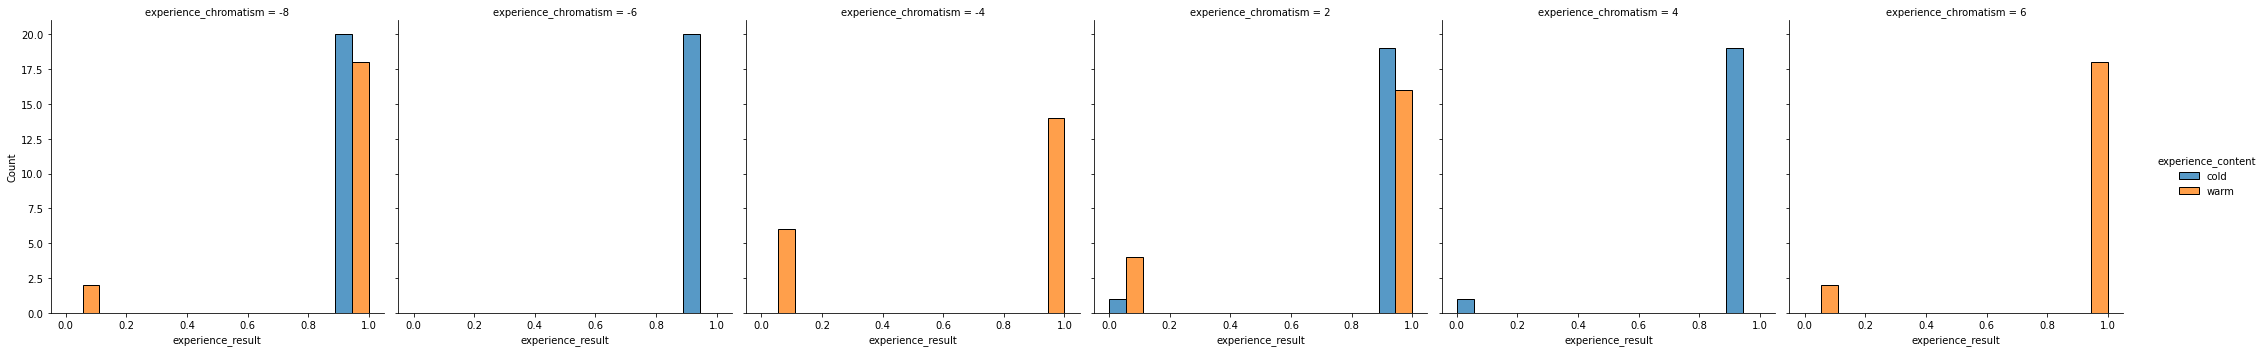

In [74]:
# plt.yticks([0,0.5,1])
sns.displot(
    # data=statistics_warm_cold[
    #     (statistics_warm_cold['experience_chromatism']==2)
    #     # (statistics_warm_cold['experience_chromatism']==2)
    # ], 
    statistics_warm_cold,
    x='experience_result', 
    hue='experience_content',
    col='experience_chromatism',
    # kde=True,
    multiple="dodge"
    )
# plt.figure(figsize=(2,2))
# plt.title("experience_chromatism for warm&cold test")

# sns.displot(data=statistics_warm_cold, x='experience_result', y='experience_chromatism')


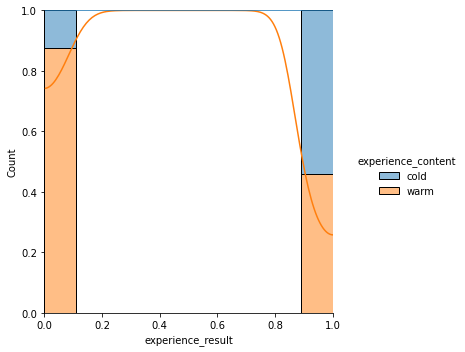

In [75]:
sns.displot(
    data=statistics_warm_cold, 
    x='experience_result', 
    hue='experience_content',
    kde=True,
    multiple="fill"
    )

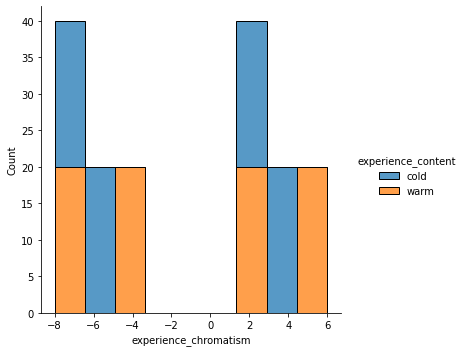

In [61]:
sns.displot(
    data=statistics_warm_cold, 
    x='experience_chromatism', 
    hue='experience_content',
    # kde=True,
    multiple="stack"
    )

确定实验结果非全整正

In [34]:
statistics_warm_cold[statistics_warm_cold["experience_result"]==1].shape[0]==statistics_warm_cold.shape[0]

False

## rank

In [76]:
statistics_rank = personal_data_dict[str(1)]['rank'][['experience_content','color_gradient','experience_result']]

for i in range(2,21):
    statistics_rank = pd.concat([
        statistics_rank,
        personal_data_dict[str(i)]['rank'][['experience_content','color_gradient','experience_result']]
    ])
statistics_rank = statistics_rank.reset_index(drop=True)
statistics_rank.to_excel('rank.xlsx')

In [77]:
statistics_rank = pd.read_excel('rank.xlsx')
statistics_rank = statistics_rank.iloc[:,1:]
statistics_rank

,experience_content,color_gradient,experience_result
0,rank,5,1
1,rank,3,1
2,rank,1,0
3,mix,5,1
4,mix,3,0
...,...,...,...
115,rank,3,1
116,rank,1,0
117,mix,5,1
118,mix,3,0


In [90]:
error = statistics_rank[statistics_rank['experience_result']==0]

In [96]:
error

,experience_content,color_gradient,experience_result,error
2,rank,1,0,5
4,mix,3,0,3
5,mix,1,0,5
8,rank,1,0,3
10,mix,3,0,2
...,...,...,...,...
112,mix,3,0,5
113,mix,1,0,1
116,rank,1,0,1
118,mix,3,0,1


d:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


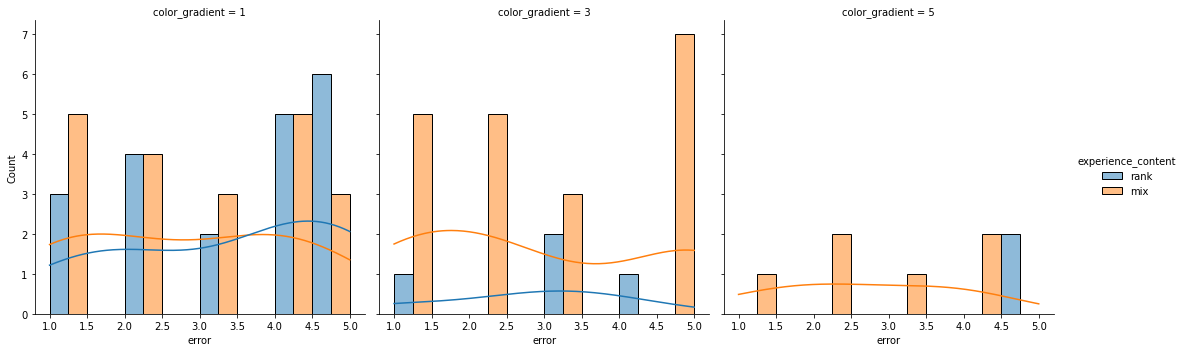

In [100]:
sns.displot(data=error, x='error', hue='experience_content',col='color_gradient',kde=True,multiple="dodge")


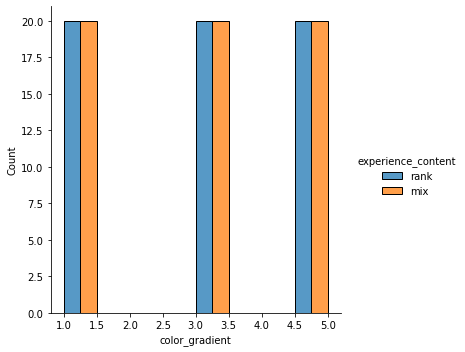

In [79]:
sns.displot(data=statistics_rank, x='experience_result', hue='color_gradient',multiple="dodge")
# sns.displot(data=statistics_rank, x="flipper_length_mm", hue="species",col="species")
# plt.figure(figsize=(2,5))


d:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


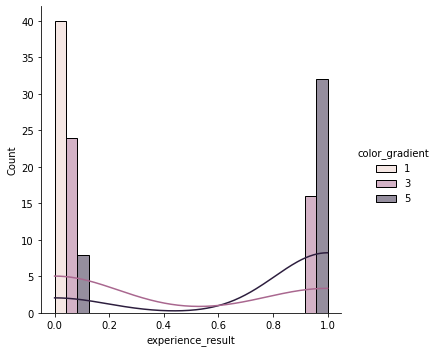

In [82]:
sns.displot(data=statistics_rank, x='experience_result', hue='color_gradient',kde=True,multiple="dodge")



In [83]:
mix = statistics_rank[statistics_rank['experience_content']=='mix']
rank = statistics_rank[statistics_rank['experience_content']=='rank']


Text(0.5, 1.0, 'rank_result_dis')

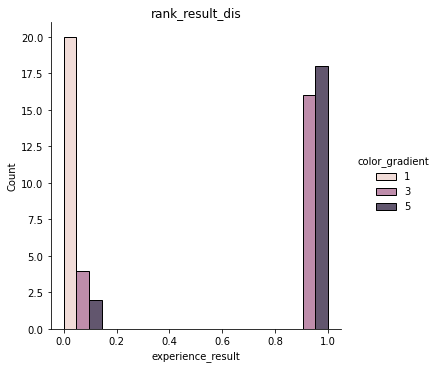

In [84]:
sns.displot(data=rank, x='experience_result', hue='color_gradient',multiple="dodge")
plt.title('rank_result_dis')



Text(0.5, 1.0, 'mix_result_dis')

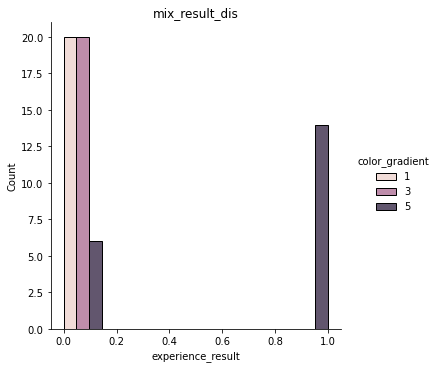

In [85]:
sns.displot(data=mix, x='experience_result', hue='color_gradient',multiple="dodge")
plt.title('mix_result_dis')